In [1]:
# import libraries

import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (18,5)

import warnings 
warnings.filterwarnings('ignore')

import statsmodels 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 
from sklearn import metrics

# Data Understanding

In [2]:
master_leads_data = pd.read_csv(r'E:\PROJECTS\Lead Scoreing project\Lead Scoring Assignment\Leads.csv') 
pd.set_option('display.max_columns', None)
master_leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# lets make a copy from master data for data cleaning and model building
leads = master_leads_data

In [4]:
leads.shape

(9240, 37)

In [5]:
round(((leads.isnull().sum())/leads.shape[0])*100,2) 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [7]:
leads.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

* there is no data imbalance issue here

# Data Cleaning

In [8]:
# lets drop 'Prospect ID' because its a uniquely identifing column and it has no use in model building 
leads.drop('Prospect ID', axis = 1 , inplace = True)

In [9]:
leads.head()


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# there are some columns which contain 'Select' which are better to be 'NaN' 
attributes_contain_select = [i for i in leads.columns for j in leads[f'{i}'].unique() if j=='Select'] 
attributes_contain_select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [11]:
# convert those select to nan 
for i in attributes_contain_select:
    leads[f'{i}'] = leads[f'{i}'].apply(lambda x:np.nan if x=='Select' else x)

In [12]:
# lets make a dataframe which contain name of attributes and corresponding missing value percentage. 
missings = pd.DataFrame(round(((leads.isnull().sum())/leads.shape[0])*100,2),columns = ['missing%'] )
missings = missings.reset_index().sort_values('missing%',ascending=False) 
missings.columns = missings.columns.str.replace('index', 'attributes')
missings

,attributes,missing%
12,How did you hear about X Education,78.46
27,Lead Profile,74.19
24,Lead Quality,51.59
29,Asymmetrique Activity Index,45.65
32,Asymmetrique Profile Score,45.65
30,Asymmetrique Profile Index,45.65
31,Asymmetrique Activity Score,45.65
28,City,39.71
11,Specialization,36.58
23,Tags,36.29


In [13]:
more_then_40per_missing = missings[missings['missing%']>40].attributes.to_list() 
more_then_40per_missing

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score']

In [14]:
# lets drop those attributes which are more than 40% missing values 
for i in more_then_40per_missing :
    leads.drop(f'{i}',axis = 1 , inplace=True) 
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [15]:
# lets see the attributes which have missing percentage between 10 to 40
missings[(missings['missing%']<40) & (missings['missing%']>10)]

,attributes,missing%
28,City,39.71
11,Specialization,36.58
23,Tags,36.29
14,What matters most to you in choosing a course,29.32
13,What is your current occupation,29.11
10,Country,26.63


In [16]:
between_10_to_40per_missing = missings[(missings['missing%']<40) & (missings['missing%']>10)].attributes.to_list() 
between_10_to_40per_missing 

['City',
 'Specialization',
 'Tags',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country']

In [17]:
# lets analyse these eight attibutes now  
for i in between_10_to_40per_missing :
    print('*'*100)
    print(f'value_counts of attribute {i}')
    print('*'*100)
    print(round((leads[f'{i}'].value_counts()/leads.shape[0])*100,2)) 
    

****************************************************************************************************
value_counts of attribute City
****************************************************************************************************
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64
****************************************************************************************************
value_counts of attribute Specialization
****************************************************************************************************
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Mana

#### observation 
* for attribute 'Country' we can replace nan with 'india' because most of the values are 'india' .
* for attribute 'What is your current occupation' we can replace nan with Unemployed because most of the values are 'Unemployed'.
* for attribute 'What matters most to you in choosing a course' we can replace with 'Better Career Prospects'. 
* for attribute 'Tags' we can't exactly determine which value should we replace so lets replace nan with 'Other'
* for attribute 'Specialization' we replace nan with 'Other' 
* for attribute 'City' we exactly determine that what value should replace will nan so lets replace nan with 'Other Cities'.

In [18]:
# Now lets replace the null values 
leads['City'] = leads['City'].fillna('Other Cities')
leads['Specialization'] = leads['Specialization'].fillna('Other') 
leads['Tags'] = leads['Tags'].fillna('Other') 
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('Better Career Prospects')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unemployed')  
leads['Country'] = leads['Country'].fillna('India') 

In [19]:
# lets see the attributes which are less then 10% missing values 
missings[(missings['missing%']<10) & (missings['missing%']>0)]

,attributes,missing%
8,Page Views Per Visit,1.48
6,TotalVisits,1.48
9,Last Activity,1.11
2,Lead Source,0.39


In [20]:
less_then_10per_missing = missings[(missings['missing%']<10) & (missings['missing%']>0)].attributes.to_list() 
less_then_10per_missing 

['Page Views Per Visit', 'TotalVisits', 'Last Activity', 'Lead Source']

In [21]:
# lets see the datatypes of these columns 
for i in less_then_10per_missing:
    print(f'datatype of {i} is')
    print(leads[f'{i}'].dtype)

datatype of Page Views Per Visit is
float64
datatype of TotalVisits is
float64
datatype of Last Activity is
object
datatype of Lead Source is
object


In [22]:
leads['Last Activity'].value_counts() 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [23]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

* for attribute  Lead Source and Last Activity its better to replace nan with the mode of that attribute because less then 2% data is missing so its dont give a big impact.

In [24]:
# Now lets replace the null values 
leads['Lead Source'] = leads['Lead Source'].fillna(leads['Lead Source'].mode()[0])
leads['Last Activity'] = leads['Last Activity'].fillna(leads['Last Activity'].mode()[0]) 

In [25]:
# lets analyse the 'Page Views Per Visit'  and  'TotalVisits' attributes 
leads['TotalVisits'].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,  nan,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,
        18.,  20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,
        28.,  26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

In [26]:
leads['Page Views Per Visit'].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,   nan,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,
        6.5 ,  4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,
        2.25,  3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,
        2.57,  2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,
        3.2 ,  1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,
        1.83,  3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,
        2.9 ,  1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,
        1.86,  2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,
        4.4 ,  3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,
        2.13,  2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,
        3.8 ,  1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [27]:
leads['TotalVisits'].mode()

0    0.0
dtype: float64

In [28]:
leads['TotalVisits'].mean()

3.445237833681204

In [29]:
leads['Page Views Per Visit'].mode()

0    0.0
dtype: float64

In [30]:
round(leads['Page Views Per Visit'].mean(),2)

2.36

* it's better to replace the nan with 0 for TotalVisits because first of all when we check the unique values in TotalVisits there is no float values so we can replace the nan with mean its better to replace with mode and after that we change the datatype of TotalVisits to integer. 
* for Page Views Per Visit it's better to replace it with mean because many values are floats so we can't replace them with 0. Let's replace them with the mean.


In [31]:
# lets implement that 
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].mode()[0])
# change the dtype to integer 
leads['TotalVisits'] = leads['TotalVisits'].astype('int')
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(round(leads['Page Views Per Visit'].mean(),2))

In [32]:
# lets  check the missing values 
leads.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [33]:
# lets fetch those columns which contain yes/no vlues and then convert them to 1/0
boolean_attributes = [i for i in leads.columns for j in leads[f'{i}'].unique() if (j=='No') ] 
boolean_attributes

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [34]:
for i in boolean_attributes:
    print(round((leads[f'{i}'].value_counts()/leads.shape[0])*100,2))
    print('*'*100)

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64
****************************************************************************************************
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64
****************************************************************************************************
No     99.85
Yes     0.15
Name: Search, dtype: float64
****************************************************************************************************
No    100.0
Name: Magazine, dtype: float64
****************************************************************************************************
No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64
****************************************************************************************************
No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64
****************************************************************************************************
No     99.99
Yes     0.01
Name: Newspaper,

##### some attributes having 100% no values so we have to drop all of them 
* because they dont provide any information . 
* such attributes are 'Through Recommendations' , 'Receive More Updates About Our Courses' , 'Update me on Supply Chain Content' , 'Get updates on DM Content' 

In [35]:
leads = leads.drop(['I agree to pay the amount through cheque' , 'Receive More Updates About Our Courses' \
            , 'Update me on Supply Chain Content' , 'Get updates on DM Content', 'Magazine' ],axis=1) 

leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0,0,0.0,Page Visited on Website,India,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Other Cities,No,Modified
1,660728,API,Organic Search,No,No,0,5,674,2.5,Email Opened,India,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Other Cities,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0,Converted to Lead,India,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [36]:
# now lets see what are the boolean attributes are left and make a list of them
boolean_attributes = [i for i in leads.columns for j in leads[f'{i}'].unique() if (j=='No') ] 
boolean_attributes

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

# EDA AND OUTLIERS TREATEMENT

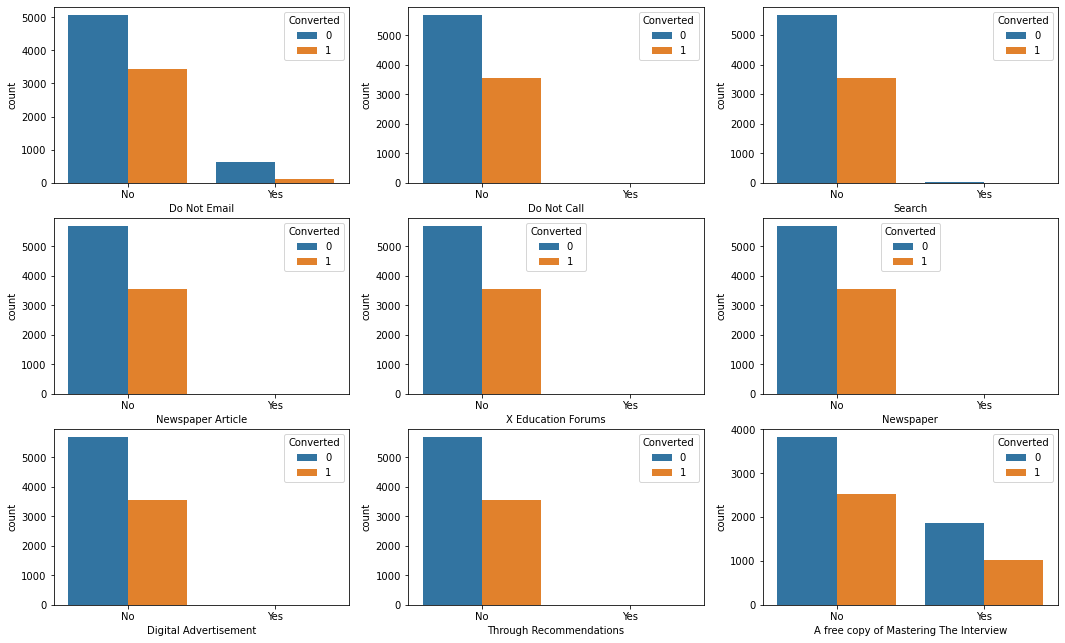

In [37]:
# bivariate analysis on boolean type attributes 
fig, ax = plt.subplots(3,3, figsize = (18,11))
counter=0
for i in boolean_attributes:
    trace_x = counter // 3
    trace_y = counter % 3
    sns.countplot(x=i,ax=ax[trace_x, trace_y],hue='Converted' ,data=leads)
    counter += 1
plt.show()

In [38]:
# there are still some attributes where the percentage of yes is so low so lets drop those columns 
leads = leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
            'Through Recommendations'],axis=1) 

In [39]:
numerical_data = (leads.select_dtypes(include = ['int','float']).columns).tolist()  
# remove 'Converted' because thats our target column.
numerical_data.remove('Converted') 
numerical_data

['Lead Number',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [40]:
leads.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.394156,487.698268,2.362778
std,23405.995698,0.486714,4.836682,548.021466,2.145333
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
85%,645401.600000,1.000000,6.000000,1233.150000,4.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000


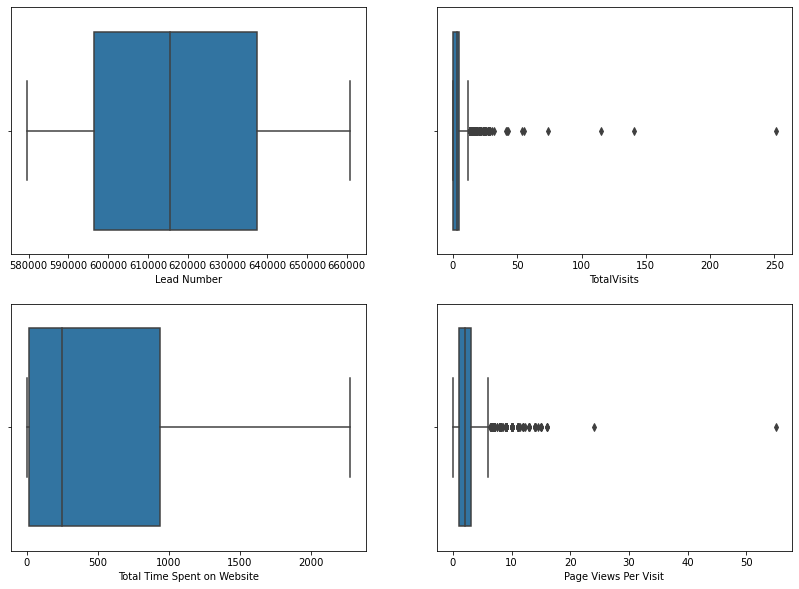

In [41]:
# boxplot on nuirical attributes for checking the outliers 
fig, ax = plt.subplots(2,2, figsize = (14,10))
counter=0
for i in numerical_data:
    trace_x = counter // 2
    trace_y = counter % 2
    sns.boxplot(i,ax=ax[trace_x, trace_y],data=leads)
    counter += 1
plt.show()

#### There are some ouliers present in page views per visit and totalvisits which cant be ignore 
* lets take the help of IQR to cap those outliers 

In [42]:
Q1 = leads.TotalVisits.quantile(0.05)
Q3 = leads.TotalVisits.quantile(0.95)
IQR = Q3 - Q1 

leads = leads[(leads.TotalVisits >= Q1 - 1.5*IQR) & (leads.TotalVisits <= Q3 + 1.5*IQR)] 

Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1 

leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

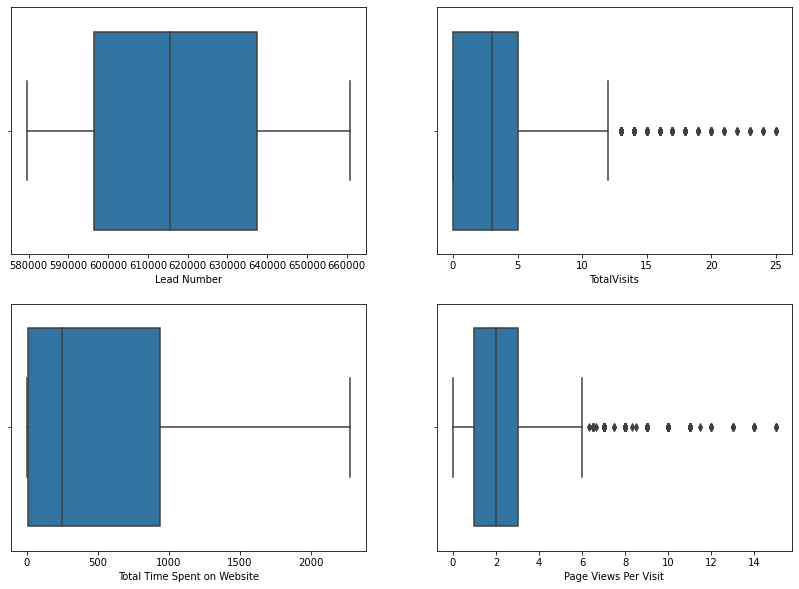

In [43]:
#again chack the boxplot
fig, ax = plt.subplots(2,2, figsize = (14,10))
counter=0
for i in numerical_data:
    trace_x = counter // 2
    trace_y = counter % 2
    sns.boxplot(i,ax=ax[trace_x, trace_y],data=leads)
    counter += 1
plt.show()

* now the outliers in TotalVisits and Page Views Per Visit are in contineous manner so its better to dont drop them.

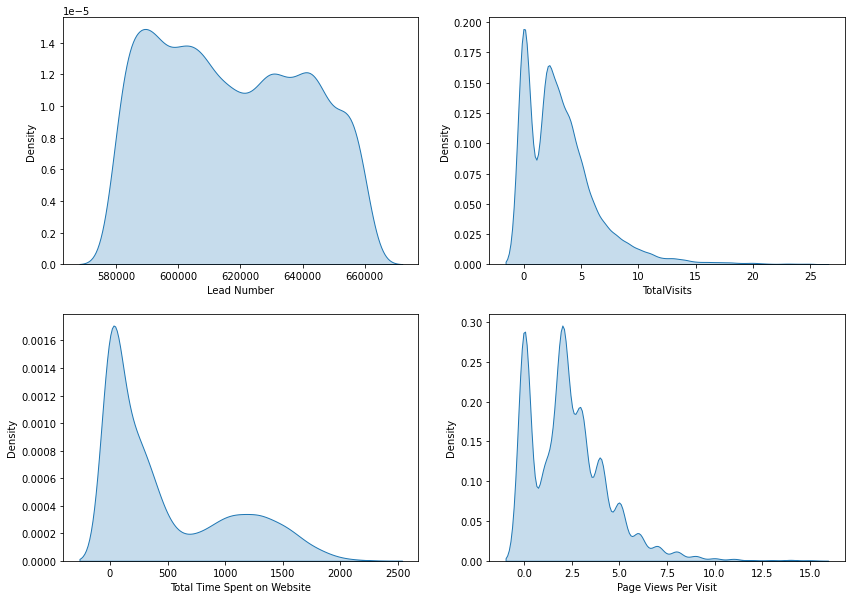

In [44]:
# also looked at kdeplot also 
fig, ax = plt.subplots(2,2, figsize = (14,10))
counter=0
for i in numerical_data:
    trace_x = counter // 2
    trace_y = counter % 2
    sns.kdeplot(i,ax=ax[trace_x, trace_y],data=leads,shade=True)
    counter += 1
plt.show()

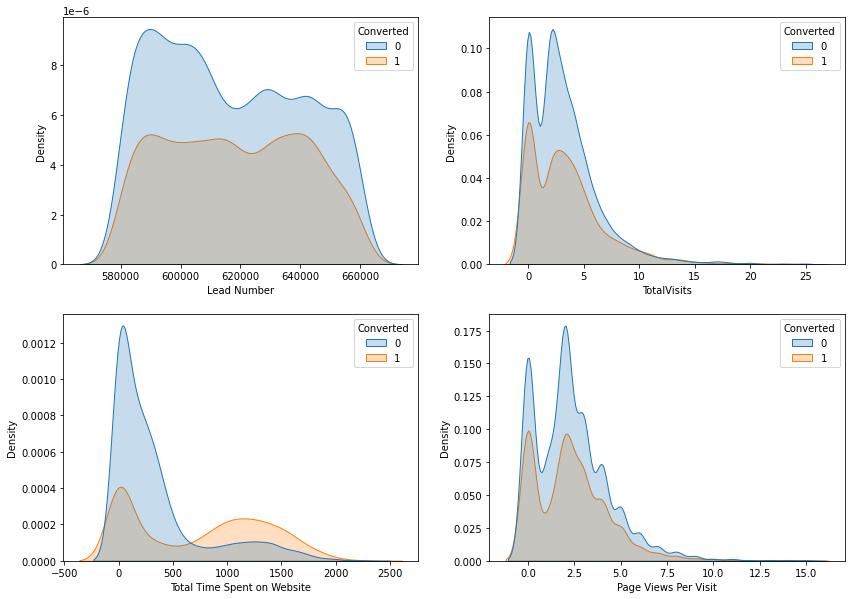

In [45]:
# Bivariate analysis on these attributes 
fig, ax = plt.subplots(2,2, figsize = (14,10))
counter=0
for i in numerical_data:
    trace_x = counter // 2
    trace_y = counter % 2
    sns.kdeplot(i,ax=ax[trace_x, trace_y],hue='Converted',data=leads,shade=True)
    counter += 1
plt.show()

* after seeing the above plot only the attribute 'Total Time Spent on Website' seems insightful because we can saw that if time spent in website is increase the converting rate also increase 
* we also have to drop Lead Number because its just a uniquely identified columns 

In [46]:
# dropping 'Lead Number' 
leads = leads.drop('Lead Number' , axis = 1)

In [47]:
# lets fetch only those attributes which are object datatype but dont have yes/no values
object_data = ['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

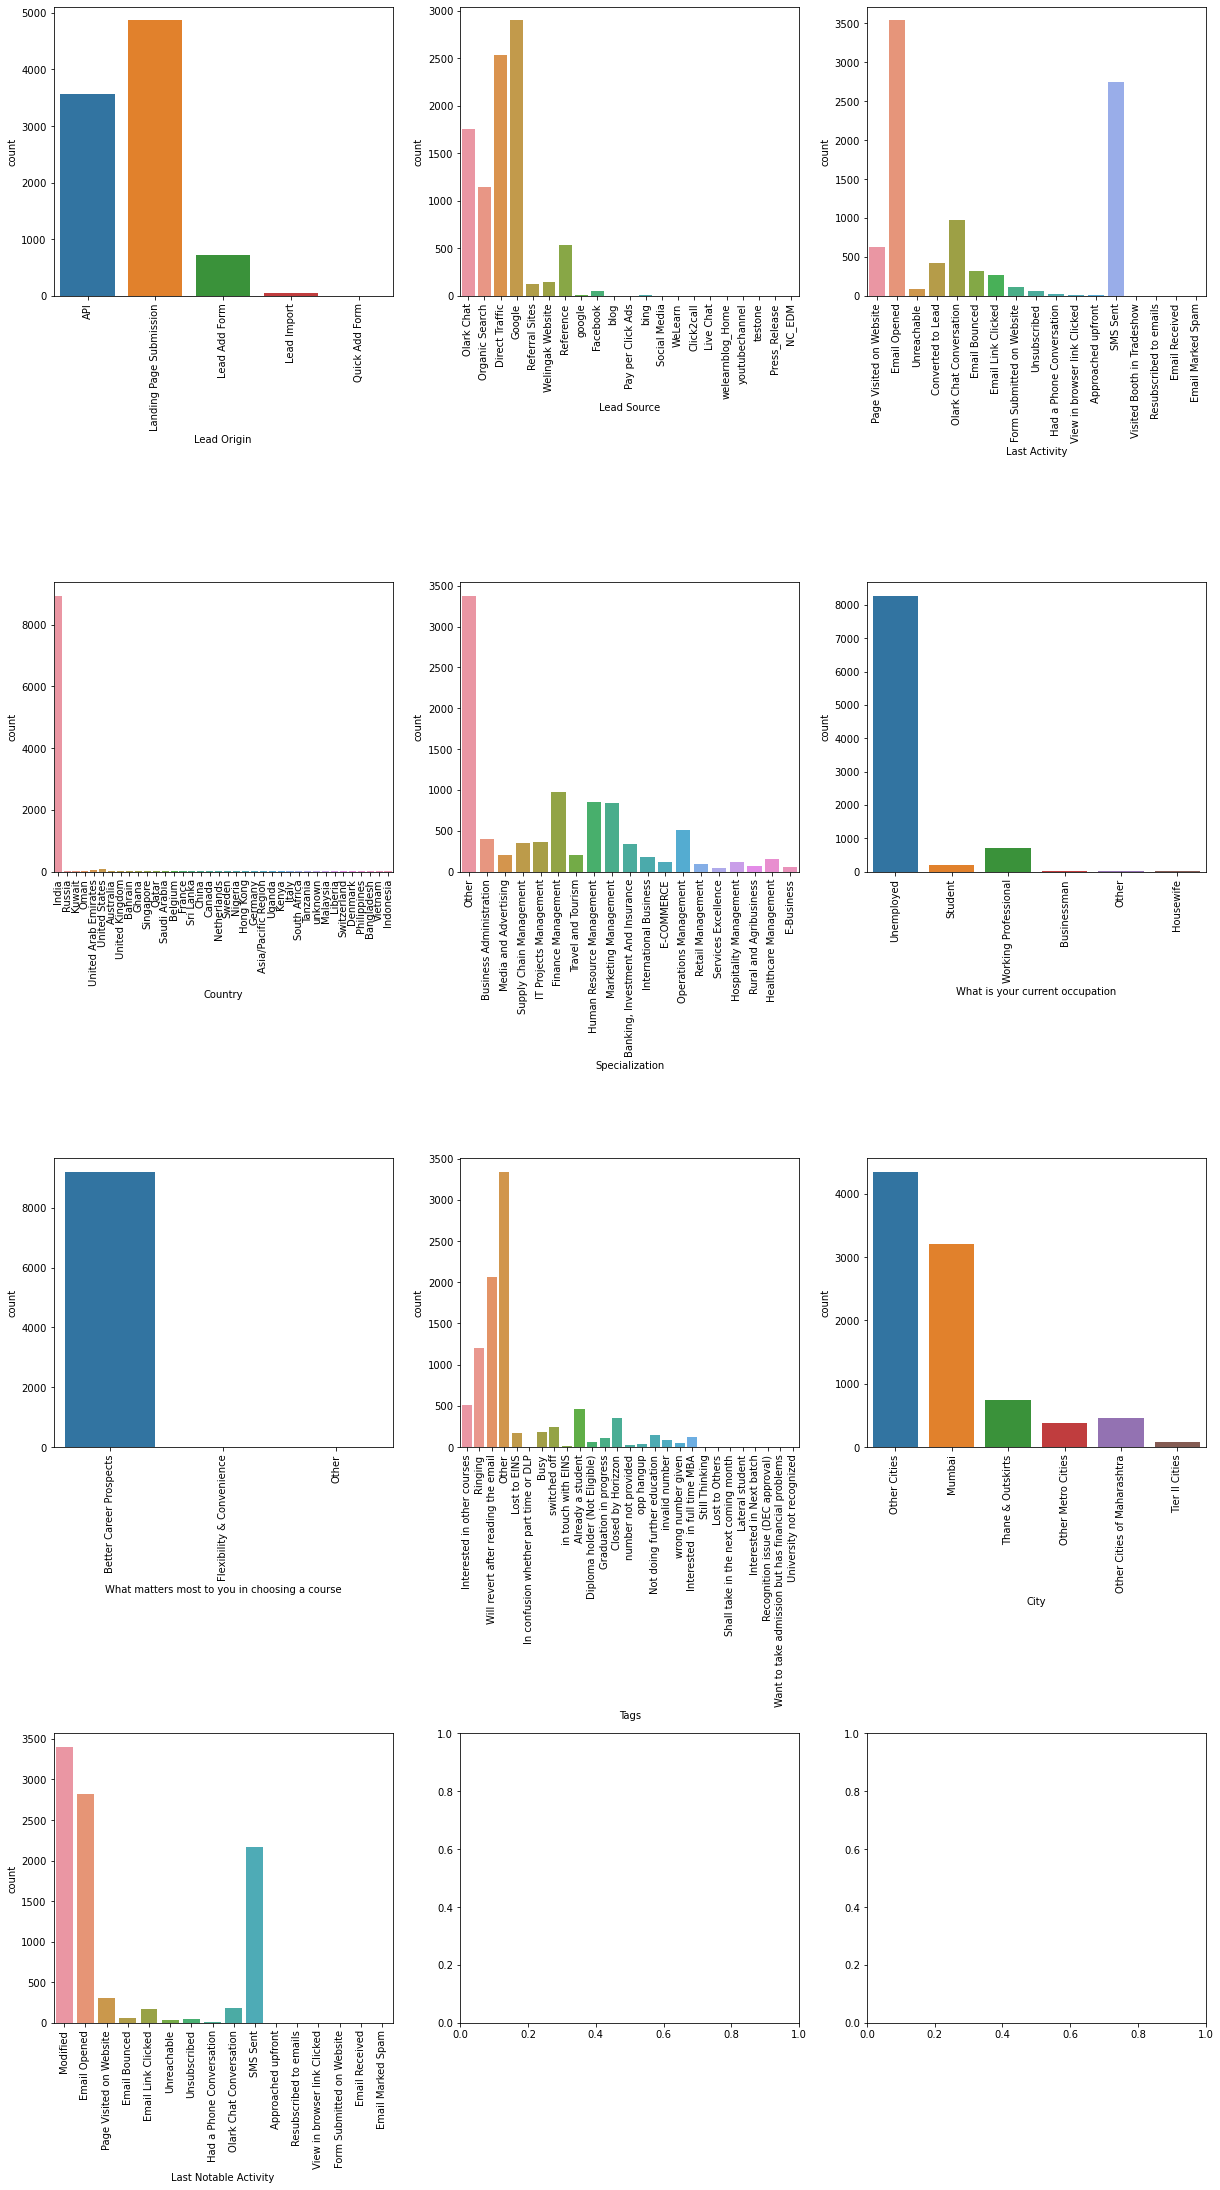

In [48]:
# univirate analysis on object datatype columns 
fig, ax = plt.subplots(4,3, figsize = (20,35))
counter=0
for i in object_data:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.countplot(x=i,ax=ax[trace_x, trace_y],data=leads)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.99) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    counter += 1
plt.show()

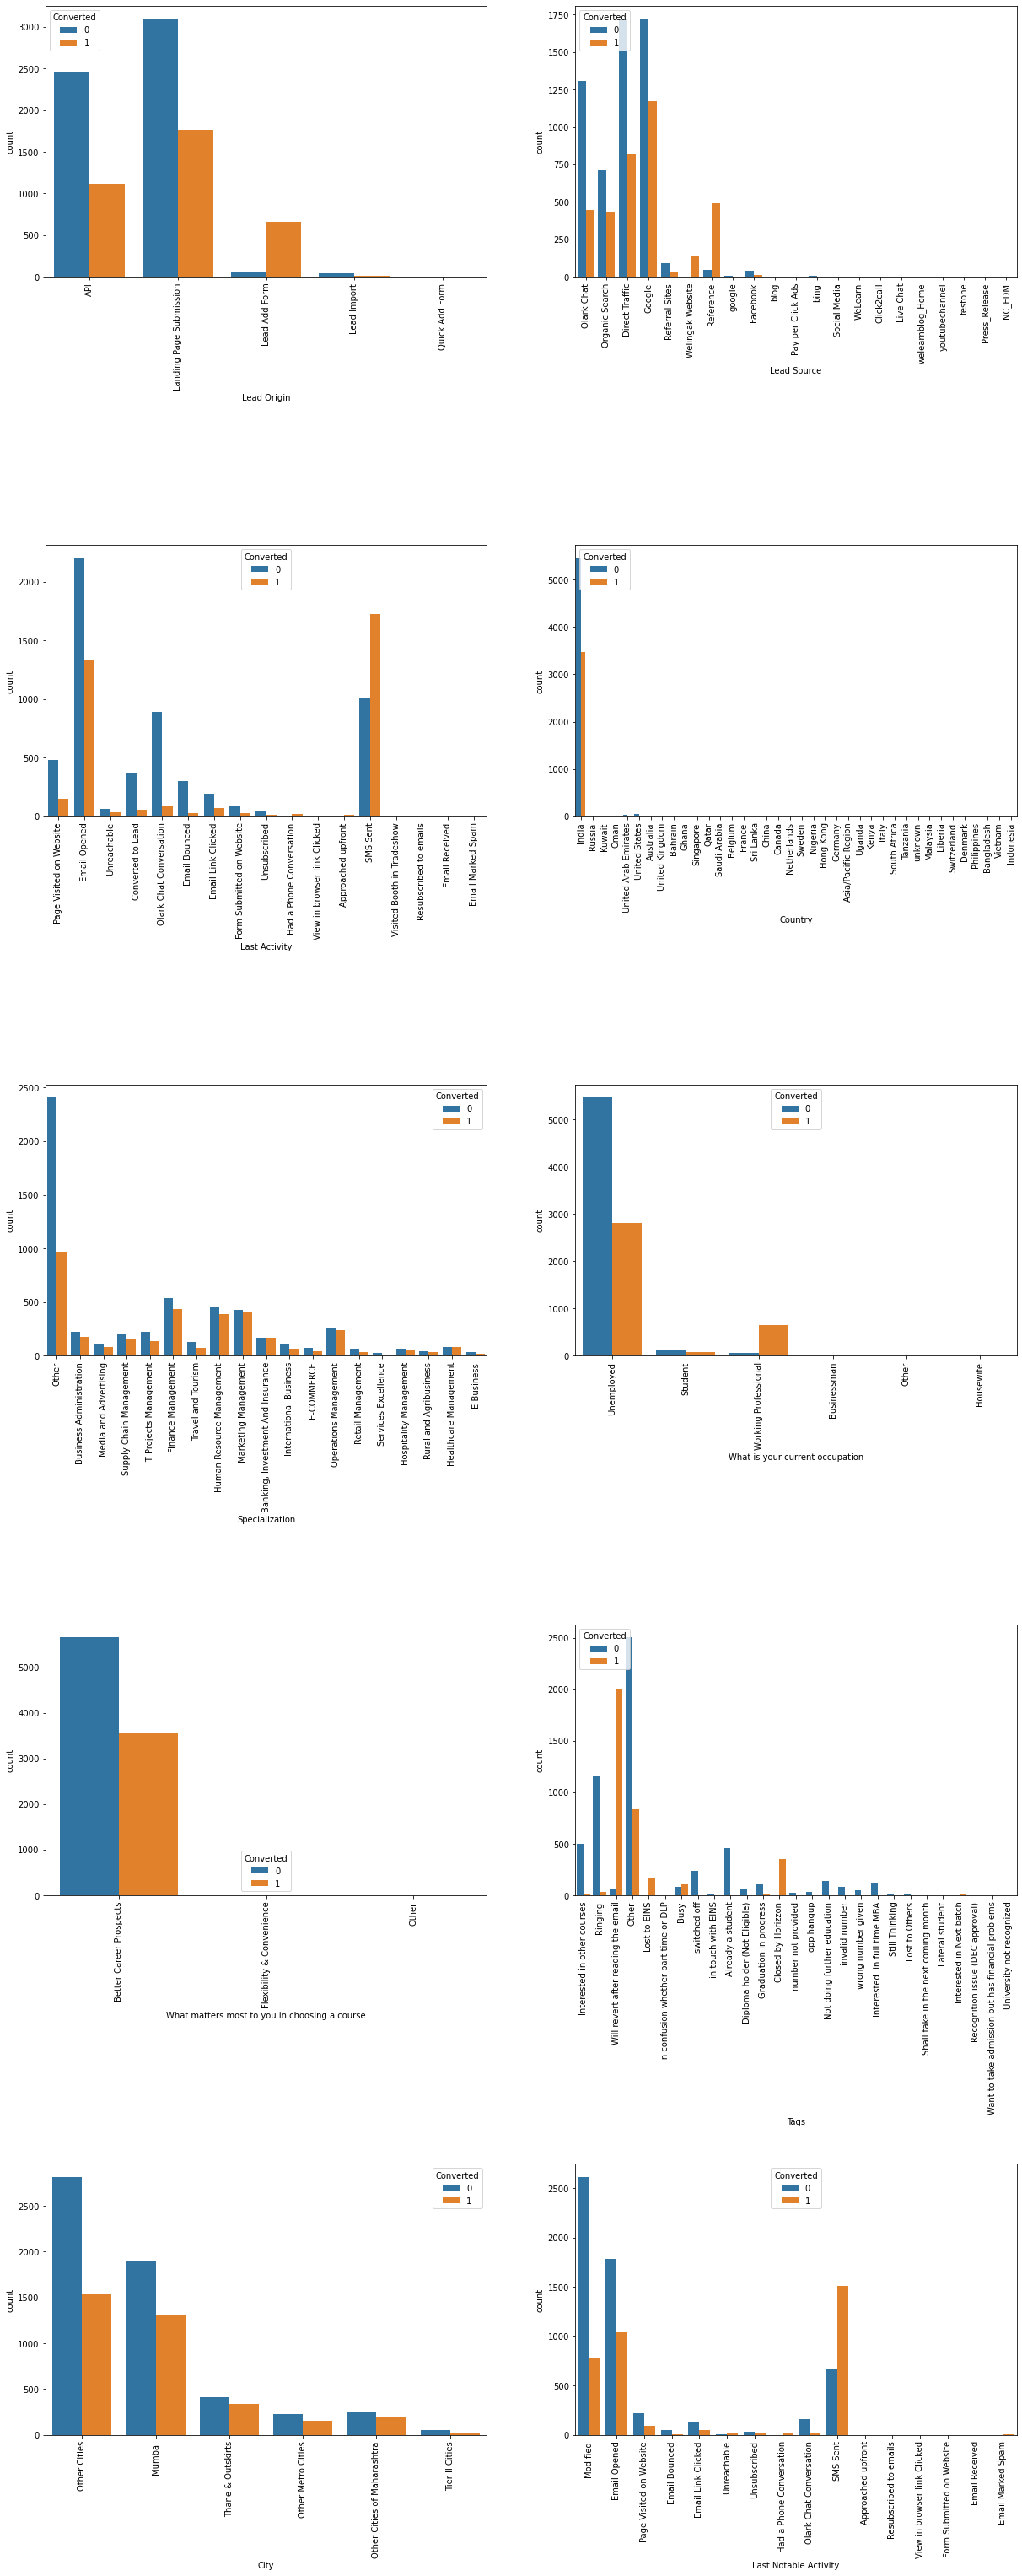

In [49]:
# Bivariate Analysis on object data type columns 
fig, ax = plt.subplots(5,2, figsize = (20,50))
counter=0
for i in object_data:
    trace_x = counter // 2
    trace_y = counter % 2
    chart=sns.countplot(x=i,ax=ax[trace_x, trace_y],hue='Converted',data=leads)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.99) 
    plt.xticks(rotation=90)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    counter += 1
plt.show()

In [50]:
#### define a function to give percentage of Converting rate  for each category
def percentage_converting(x):
    ## in  the position of x give the name of column  in parenthesis which you want to analyse
    value=[]
    value_count_percentage=[]
    percentage_converting=[]
    for i in leads[x].unique():
        percentage_converting.append(round((leads[(leads[x]==i)&(leads.Converted==1)].shape[0])/(leads[(leads[x]==i)].shape[0])*100,2))
        value_count_percentage.append(round((leads[(leads[x]==i)].shape[0]/leads.shape[0])*100,2))
        value.append(i)
    print(pd.DataFrame({'value':value,'value_count_percentage':value_count_percentage,'percentage_converting':percentage_converting})) 

In [51]:
for i in object_data:
    print(f'{i} attribute percentage convertings')
    print('*'*100)
    percentage_converting(i)
    print('*'*100)

Lead Origin attribute percentage convertings
****************************************************************************************************
                     value  value_count_percentage  percentage_converting
0                      API                   38.80                  31.10
1  Landing Page Submission                   52.81                  36.27
2            Lead Add Form                    7.78                  92.47
3              Lead Import                    0.60                  23.64
4           Quick Add Form                    0.01                 100.00
****************************************************************************************************
Lead Source attribute percentage convertings
****************************************************************************************************
                value  value_count_percentage  percentage_converting
0          Olark Chat                   19.05                  25.53
1      Organic Search    

In [52]:
# replace some very low catagories to Others for 'Lead Source' category 
leads['Lead Source'] = leads['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Social Media','Welingak Website',
                                                    'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home','Reference',
                                                    'youtubechannel', 'testone', 'Press_Release', 'NC_EDM','Referral Sites',\
                                                     'Facebook'],'Other')  
# also there is two 'google' replace them also
leads['Lead Source'] = leads['Lead Source'].replace('google','Google') 

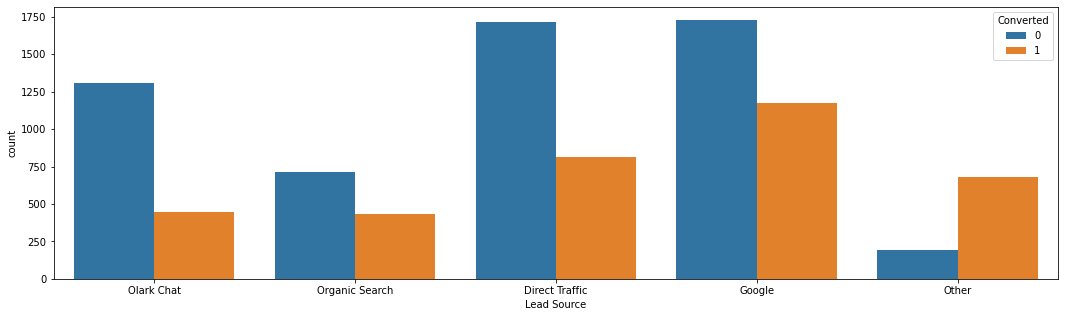

In [53]:
# now lets plot again
sns.countplot(x='Lead Source',hue='Converted',data=leads)
plt.show()

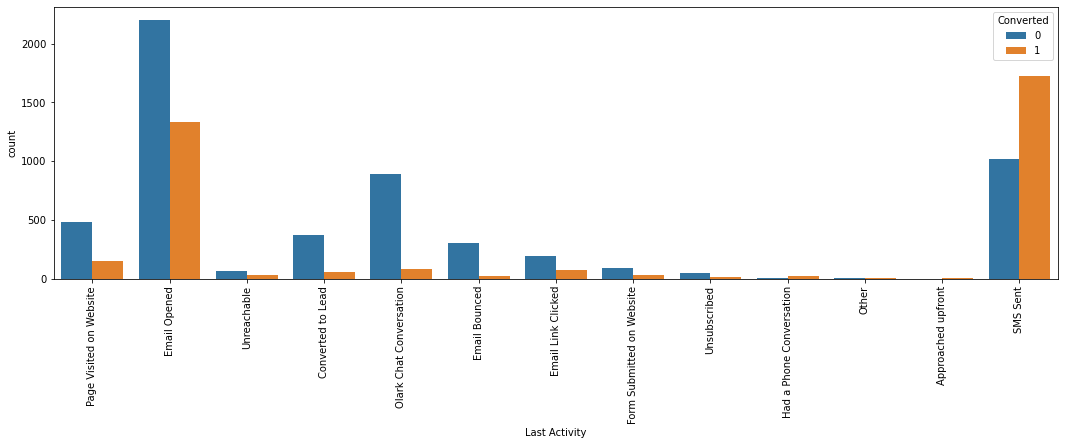

In [54]:
# replace some very low catagories to Others for 'Last Activity' category 
leads['Last Activity'] = leads['Last Activity'].replace(['View in browser link Clicked', 'Visited Booth in Tradeshow',
                                                         'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
                                                        'Other')  
# now lets plot again
sns.countplot(x='Last Activity',hue='Converted',data=leads)
plt.xticks(rotation=90)
plt.show()

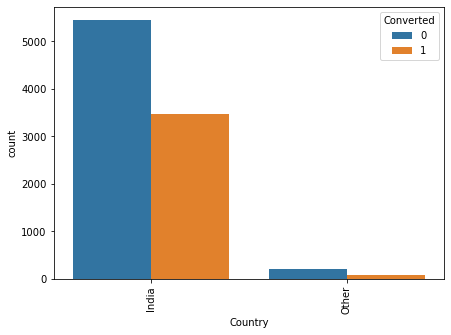

In [55]:
# 96% of values are india and only 4% are other contries so lets replace the other countries as 'Other'
leads['Country'] = leads['Country'].replace(['Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
                                            'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
                                            'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
                                            'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
                                            'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
                                            'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
                                            'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
                                            'Vietnam', 'Indonesia'],'Other')  
# now lets plot again
plt.figure(figsize=[7,5])
sns.countplot(x='Country',hue='Converted',data=leads)
#plt.figure(figsize=[10,10])
plt.xticks(rotation=90)
plt.show()

In [56]:
# dropping the column or attribute 'What matters most to you in choosing a course' 
# reason is that value count for 'Better Career Prospects' is 99.97% so this column dont give any insights so lets drop this 
leads = leads.drop('What matters most to you in choosing a course',axis=1)

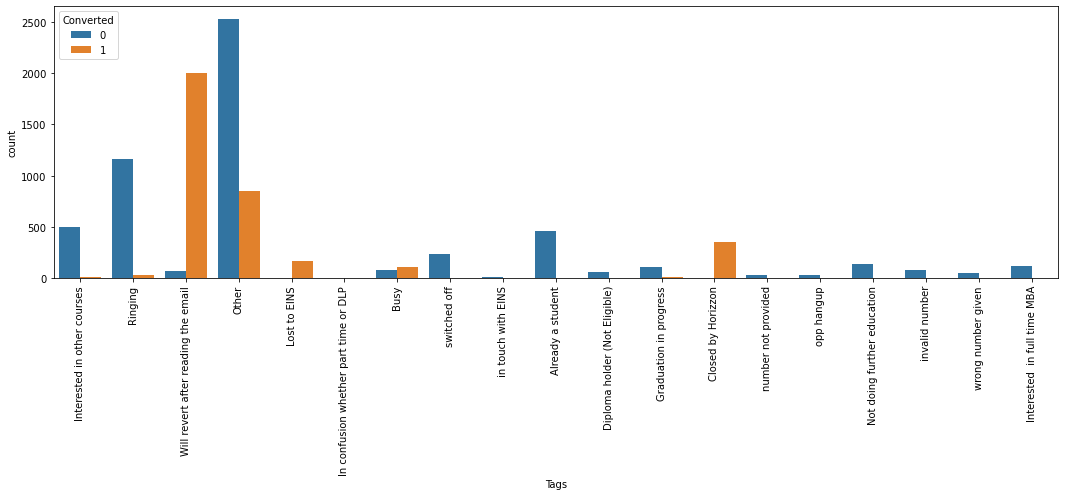

In [57]:
# replace some very low catagories to Others for 'Tags' category 
leads['Tags'] = leads['Tags'].replace(['Still Thinking', 'Lost to Others','Shall take in the next coming month', 
                                       'Lateral student','Interested in Next batch', 'Recognition issue (DEC approval)',
                                       'Want to take admission but has financial problems',
                                       'University not recognized'],'Other') 
# now lets plot again
sns.countplot(x='Tags',hue='Converted',data=leads)
plt.xticks(rotation=90)
plt.show()

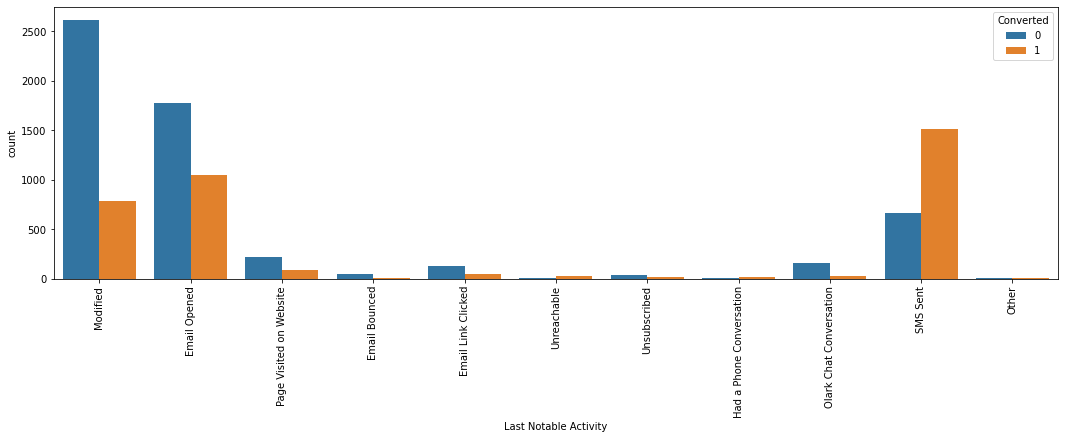

In [58]:
# replace some very low catagories to Others for 'Tags' category 
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails', 
                                                                         'View in browser link Clicked','Form Submitted on Website', 
                                                                         'Email Received', 'Email Marked Spam'],'Other') 
# now lets plot again
sns.countplot(x='Last Notable Activity',hue='Converted',data=leads)
plt.xticks(rotation=90)
plt.show()

In [59]:
# lets see how many columns we left with 
leads.shape

(9214, 15)

# EDA SUMMERY

* SOME FEATURES WHICH ARE SEEMS MOST INSIGHTFUL ARE 
1. Last Notable Activity 
2. TAGS 
3. Total Time Spent On Website 
4. Last Activity 
5. Lead Source 
* So while making models we also have to consider these features .


# Data Preprocessing 


In [60]:
boolean_attributes = ['Do Not Email','A free copy of Mastering The Interview'] 
# lets convert the yes/no to 1/0 for these above columns
for i in boolean_attributes :
    leads[i] = leads[i].apply(lambda x:1 if x=='Yes' else 0)


In [61]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,India,Other,Unemployed,Interested in other courses,Other Cities,0,Modified
1,API,Organic Search,0,0,5,674,2.5,Email Opened,India,Other,Unemployed,Ringing,Other Cities,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,India,Other,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [62]:
leads['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [63]:
leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                                int64
Converted                                   int64
TotalVisits                                 int32
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Country                                    object
Specialization                             object
What is your current occupation            object
Tags                                       object
City                                       object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object
dtype: object

In [64]:
leads.shape

(9214, 15)

In [65]:
# Creating dummy variables for the above categorical variables  
# Creating dummy variables for the variable ''Lead Origin'' 
Lead_Origin = pd.get_dummies(leads['Lead Origin'],prefix='Lead Org') 
#Adding the results to the master dataframe
leads = pd.concat([leads,Lead_Origin],axis = 1) 
#drop the extra column
leads = leads.drop('Lead Origin', axis = 1) 


# Creating dummy variables for the variable ''Lead Source''
Lead_Source = pd.get_dummies(leads['Lead Source'],prefix='Lead Src') 
#dropping the Other column 
Lead_Source = Lead_Source.drop(['Lead Src_Other'], 1)
#Adding the results to the master dataframe 
leads = pd.concat([leads,Lead_Source],axis = 1) 
#drop the extra column
leads = leads.drop('Lead Source', axis = 1)

# Creating dummy variables for the variable ''Last Activity''
Last_Activity = pd.get_dummies(leads['Last Activity'],prefix='Last Act') 
#dropping the Other column
Last_Activity = Last_Activity.drop(['Last Act_Other'], 1) 
#Adding the results to the master dataframe 
leads = pd.concat([leads,Last_Activity],axis = 1) 
#drop the extra column
leads = leads.drop('Last Activity', axis = 1) 

# Creating dummy variables for the variable ''Country''
Country = pd.get_dummies(leads['Country'],prefix='CTRY') 
#dropping the Other column
Country = Country.drop(['CTRY_Other'], 1) 
#Adding the results to the master dataframe 
leads = pd.concat([leads,Country],axis = 1) 
#drop the extra column
leads = leads.drop('Country', axis = 1) 

# Creating dummy variables for the variable ''Specialization''
Specialization = pd.get_dummies(leads['Specialization'],prefix='SPEC') 
#dropping the Other column
Specialization = Specialization.drop(['SPEC_Other'], 1) 
#Adding the results to the master dataframe 
leads = pd.concat([leads,Specialization],axis = 1) 
#drop the extra column
leads = leads.drop('Specialization', axis = 1)  

# Creating dummy variables for the variable ''What is your current occupation''
occupation = pd.get_dummies(leads['What is your current occupation'],prefix='OCC') 
#dropping the Other column
occupation = occupation.drop(['OCC_Other'], 1) 
#Adding the results to the master dataframe 
leads = pd.concat([leads,occupation],axis = 1) 
#drop the extra column
leads = leads.drop('What is your current occupation', axis = 1) 

# Creating dummy variables for the variable ''Tags''
Tags = pd.get_dummies(leads['Tags'],prefix='Tags') 
#dropping the Other column
Tags = Tags.drop(['Tags_Other'], 1) 
#Adding the results to the master dataframe 
leads = pd.concat([leads,Tags],axis = 1) 
#drop the extra column
leads = leads.drop('Tags', axis = 1)  


# Creating dummy variables for the variable ''City''
City = pd.get_dummies(leads['City'],prefix='City') 
#dropping the Other column
City = City.drop(['City_Other Cities'], 1) 
#Adding the results to the master dataframe 
leads = pd.concat([leads,City],axis = 1) 
#drop the extra column
leads = leads.drop('City', axis = 1) 


# Creating dummy variables for the variable ''Last Notable Activity''
Last_Notable_Activity  = pd.get_dummies(leads['Last Notable Activity'],prefix='Last Not Act') 
#dropping the Other column
Last_Notable_Activity  = Last_Notable_Activity.drop(['Last Not Act_Other'], 1) 
#Adding the results to the master dataframe 
leads = pd.concat([leads,Last_Notable_Activity],axis = 1) 
#drop the extra column
leads = leads.drop('Last Notable Activity' , axis = 1)  


In [66]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Org_API,Lead Org_Landing Page Submission,Lead Org_Lead Add Form,Lead Org_Lead Import,Lead Org_Quick Add Form,Lead Src_Direct Traffic,Lead Src_Google,Lead Src_Olark Chat,Lead Src_Organic Search,Last Act_Approached upfront,Last Act_Converted to Lead,Last Act_Email Bounced,Last Act_Email Link Clicked,Last Act_Email Opened,Last Act_Form Submitted on Website,Last Act_Had a Phone Conversation,Last Act_Olark Chat Conversation,Last Act_Page Visited on Website,Last Act_SMS Sent,Last Act_Unreachable,Last Act_Unsubscribed,CTRY_India,"SPEC_Banking, Investment And Insurance",SPEC_Business Administration,SPEC_E-Business,SPEC_E-COMMERCE,SPEC_Finance Management,SPEC_Healthcare Management,SPEC_Hospitality Management,SPEC_Human Resource Management,SPEC_IT Projects Management,SPEC_International Business,SPEC_Marketing Management,SPEC_Media and Advertising,SPEC_Operations Management,SPEC_Retail Management,SPEC_Rural and Agribusiness,SPEC_Services Excellence,SPEC_Supply Chain Management,SPEC_Travel and Tourism,OCC_Businessman,OCC_Housewife,OCC_Student,OCC_Unemployed,OCC_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Not Act_Email Bounced,Last Not Act_Email Link Clicked,Last Not Act_Email Opened,Last Not Act_Had a Phone Conversation,Last Not Act_Modified,Last Not Act_Olark Chat Conversation,Last Not Act_Page Visited on Website,Last Not Act_SMS Sent,Last Not Act_Unreachable,Last Not Act_Unsubscribed
0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,2,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,2,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [67]:
leads.shape

(9214, 84)

In [68]:
# defining a function to identify the highly correlated attributes 
def correlation(dataset, threshold):
    col_corr = []  # list of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.append(colname)
    return col_corr

In [69]:
# lets take the threshold 0.80 means anything above 0.80 means multicolinearity .
high_corr = correlation(leads , 0.80) 
high_corr

['Lead Org_Landing Page Submission',
 'OCC_Working Professional',
 'Last Not Act_Email Opened',
 'Last Not Act_SMS Sent',
 'Last Not Act_Unsubscribed']

In [70]:
# lets drop these highly correlated columns 
leads = leads.drop(high_corr,axis=1)

In [71]:
leads.shape 

(9214, 79)

# MODEL BUILDING

In [72]:
X = leads.drop('Converted', axis=1) 
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Org_API,Lead Org_Lead Add Form,Lead Org_Lead Import,Lead Org_Quick Add Form,Lead Src_Direct Traffic,Lead Src_Google,Lead Src_Olark Chat,Lead Src_Organic Search,Last Act_Approached upfront,Last Act_Converted to Lead,Last Act_Email Bounced,Last Act_Email Link Clicked,Last Act_Email Opened,Last Act_Form Submitted on Website,Last Act_Had a Phone Conversation,Last Act_Olark Chat Conversation,Last Act_Page Visited on Website,Last Act_SMS Sent,Last Act_Unreachable,Last Act_Unsubscribed,CTRY_India,"SPEC_Banking, Investment And Insurance",SPEC_Business Administration,SPEC_E-Business,SPEC_E-COMMERCE,SPEC_Finance Management,SPEC_Healthcare Management,SPEC_Hospitality Management,SPEC_Human Resource Management,SPEC_IT Projects Management,SPEC_International Business,SPEC_Marketing Management,SPEC_Media and Advertising,SPEC_Operations Management,SPEC_Retail Management,SPEC_Rural and Agribusiness,SPEC_Services Excellence,SPEC_Supply Chain Management,SPEC_Travel and Tourism,OCC_Businessman,OCC_Housewife,OCC_Student,OCC_Unemployed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Not Act_Email Bounced,Last Not Act_Email Link Clicked,Last Not Act_Had a Phone Conversation,Last Not Act_Modified,Last Not Act_Olark Chat Conversation,Last Not Act_Page Visited on Website,Last Not Act_Unreachable
0,0,0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,2,1428,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [73]:
y = leads['Converted'] 
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

## TRAIN TEST SPLIT

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(6449, 78)
(2765, 78)
(6449,)
(2765,)


## SCALING 

In [76]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website',
                                                                'Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Org_API,Lead Org_Lead Add Form,Lead Org_Lead Import,Lead Org_Quick Add Form,Lead Src_Direct Traffic,Lead Src_Google,Lead Src_Olark Chat,Lead Src_Organic Search,Last Act_Approached upfront,Last Act_Converted to Lead,Last Act_Email Bounced,Last Act_Email Link Clicked,Last Act_Email Opened,Last Act_Form Submitted on Website,Last Act_Had a Phone Conversation,Last Act_Olark Chat Conversation,Last Act_Page Visited on Website,Last Act_SMS Sent,Last Act_Unreachable,Last Act_Unsubscribed,CTRY_India,"SPEC_Banking, Investment And Insurance",SPEC_Business Administration,SPEC_E-Business,SPEC_E-COMMERCE,SPEC_Finance Management,SPEC_Healthcare Management,SPEC_Hospitality Management,SPEC_Human Resource Management,SPEC_IT Projects Management,SPEC_International Business,SPEC_Marketing Management,SPEC_Media and Advertising,SPEC_Operations Management,SPEC_Retail Management,SPEC_Rural and Agribusiness,SPEC_Services Excellence,SPEC_Supply Chain Management,SPEC_Travel and Tourism,OCC_Businessman,OCC_Housewife,OCC_Student,OCC_Unemployed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Not Act_Email Bounced,Last Not Act_Email Link Clicked,Last Not Act_Had a Phone Conversation,Last Not Act_Modified,Last Not Act_Olark Chat Conversation,Last Not Act_Page Visited on Website,Last Not Act_Unreachable
2178,0,0.530451,-0.715514,1.304769,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2924,0,-0.996864,0.057816,0.009366,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9108,0,0.224988,2.673012,0.814086,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7926,0,0.224988,-0.463774,-0.496038,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7870,0,0.835915,-0.461963,1.795452,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [77]:
logreg = LogisticRegression()

rfe_top10 = RFE(logreg, 10)            
rfe_top10 = rfe_top10.fit(X_train, y_train) 

rfe_top15 = RFE(logreg, 15)            
rfe_top15 = rfe_top15.fit(X_train, y_train) 

rfe_top30 = RFE(logreg, 30)            
rfe_top30 = rfe_top30.fit(X_train, y_train) 

top10_features = X_train.columns[rfe_top10.support_].to_list() 
top15_features = X_train.columns[rfe_top15.support_].to_list()
top30_features = X_train.columns[rfe_top30.support_].to_list()


print(top10_features)
print('*'*120)
print(top15_features)
print('*'*120)
print(top30_features)

['Lead Org_Lead Add Form', 'Last Act_SMS Sent', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Tags_wrong number given']
************************************************************************************************************************
['Lead Org_Lead Add Form', 'Last Act_SMS Sent', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off', 'Tags_wrong number given', 'Last Not Act_Modified']
************************************************************************************************************************
['Do Not Email', 'Total Time Spent on Website', 'Lead Org_API', 'Lead Org_Lea

### According to RFE  important features are 

# Lead Source # Tags #Last notable activity # Lead organization # Last activity # Specialization # Occupation # Do not mail # Total Time Spent on Website


In [78]:
# lets make our 1st model using top15 features according to RFE
X_train_sm = X_train[top15_features] 
X_train_sm = sm.add_constant(X_train_sm) 
logm1 = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial()).fit() 
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1466.6
Date:                Sun, 07 Aug 2022   Deviance:                       2933.1
Time:                        01:28:10   Pearson chi2:                 1.16e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [79]:
def VIF(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [80]:
print(VIF(X_train_sm)) 

                                    Features   VIF
0                                      const  3.86
10  Tags_Will revert after reading the email  1.36
4                    Tags_Closed by Horizzon  1.22
1                     Lead Org_Lead Add Form  1.20
9                               Tags_Ringing  1.17
15                     Last Not Act_Modified  1.16
2                          Last Act_SMS Sent  1.15
6           Tags_Interested in other courses  1.11
3                     Tags_Already a student  1.08
7                          Tags_Lost to EINS  1.04
13                         Tags_switched off  1.04
8           Tags_Not doing further education  1.03
5          Tags_Interested  in full time MBA  1.02
11                       Tags_invalid number  1.01
12                  Tags_number not provided  1.01
14                   Tags_wrong number given  1.01


* Vif is all good
* But the p-value for some features are not significant so lets drop them and rerun the model 
* Those Features are Tags_Not doing further education , Tags_number not provided , Tags_wrong number given ,Tags_Interested  in full time MBA

In [81]:
col = ['Tags_Will revert after reading the email','Tags_Closed by Horizzon',
'Lead Org_Lead Add Form',  'Tags_Ringing', 'Last Not Act_Modified' ,  'Last Act_SMS Sent' , 'Tags_Interested in other courses' ,  
'Tags_Already a student' ,  
'Tags_Lost to EINS' , 
'Tags_switched off', 
'Tags_invalid number'  ]

In [82]:
X_train_sm = X_train[col] 
X_train_sm = sm.add_constant(X_train_sm) 
logm2 = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial()).fit() 
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1509.7
Date:                Sun, 07 Aug 2022   Deviance:                       3019.4
Time:                        01:28:11   Pearson chi2:                 1.18e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [83]:
print(VIF(X_train_sm)) 

                                    Features   VIF
0                                      const  3.68
1   Tags_Will revert after reading the email  1.33
2                    Tags_Closed by Horizzon  1.21
3                     Lead Org_Lead Add Form  1.20
5                      Last Not Act_Modified  1.16
4                               Tags_Ringing  1.15
6                          Last Act_SMS Sent  1.15
7           Tags_Interested in other courses  1.09
8                     Tags_Already a student  1.07
10                         Tags_switched off  1.04
9                          Tags_Lost to EINS  1.03
11                       Tags_invalid number  1.01


* ok so now p-value and vif all are good to go 
* previously we saw that 'Total Time Spent on Website' is also seems very insightful so lets add it and rerun the model

In [84]:
col.append('Total Time Spent on Website')
col

['Tags_Will revert after reading the email',
 'Tags_Closed by Horizzon',
 'Lead Org_Lead Add Form',
 'Tags_Ringing',
 'Last Not Act_Modified',
 'Last Act_SMS Sent',
 'Tags_Interested in other courses',
 'Tags_Already a student',
 'Tags_Lost to EINS',
 'Tags_switched off',
 'Tags_invalid number',
 'Total Time Spent on Website']

In [85]:
X_train_sm = X_train[col] 
X_train_sm = sm.add_constant(X_train_sm) 
logm3 = sm.GLM(y_train , X_train_sm , family = sm.families.Binomial()).fit() 
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1376.2
Date:                Sun, 07 Aug 2022   Deviance:                       2752.3
Time:                        01:28:11   Pearson chi2:                 1.09e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [86]:
print(VIF(X_train_sm))

                                    Features   VIF
0                                      const  3.71
1   Tags_Will revert after reading the email  1.46
3                     Lead Org_Lead Add Form  1.30
2                    Tags_Closed by Horizzon  1.27
12               Total Time Spent on Website  1.21
5                      Last Not Act_Modified  1.16
6                          Last Act_SMS Sent  1.16
4                               Tags_Ringing  1.15
7           Tags_Interested in other courses  1.09
8                     Tags_Already a student  1.07
9                          Tags_Lost to EINS  1.05
10                         Tags_switched off  1.04
11                       Tags_invalid number  1.01


* all p-values and vif is good
* lets take this our final model 

In [87]:
# now lets make a dataframe which contain actual_converted vs predicted_converted.
y_train_pred = logm3.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1) 
y_train_pred_final = pd.DataFrame({'actual_conv':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index 

# assigning Score to each Leads
y_train_pred_final['Lead score'] = y_train_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

# for now lets take the 0.5 as our cutoff .
y_train_pred_final['predicted_conv'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0) 
y_train_pred_final.head()

,actual_conv,Converted_Prob,CustID,Lead score,predicted_conv
0,0,0.149718,2178,15,0
1,1,0.998909,2924,100,1
2,0,0.357033,9108,36,0
3,0,0.028360,7926,3,0
4,0,0.151038,7870,15,0


In [88]:
# now lets saw the sensitivity and spacificity of the new model 
print(f'sensitivity/Recall-->{metrics.recall_score(y_train_pred_final.actual_conv , y_train_pred_final.predicted_conv)} ') 

#but for calculating spacificity we need TN and FP 
con_metrics = metrics.confusion_matrix(y_train_pred_final.actual_conv, y_train_pred_final.predicted_conv) 
TN = con_metrics[0,0]
FP = con_metrics[0,1] 
print(f'spacificity-->{TN/float(TN+FP)}')

# also let see the pricision 
print(f'precision/Positive predicted Rate-->{metrics.precision_score(y_train_pred_final.actual_conv, y_train_pred_final.predicted_conv)}') 

#lets find False Positive Rate FP/FP+TN 
print(f'False Positive Rate-->{FP/float(TN+FP)}') 

#lets also find Negetive Predicted Rate  
FN = con_metrics[1,0] 
print(f'Negetive Predicted value-->{TN/float(FN+TN)}') 

# accuracy 
print(f'Accuracy--> {metrics.accuracy_score(y_train_pred_final.actual_conv, y_train_pred_final.predicted_conv)}')

sensitivity/Recall-->0.8592885375494071 
spacificity-->0.9507527430466955
precision/Positive predicted Rate-->0.9184621884241656
False Positive Rate-->0.04924725695330442
Negetive Predicted value-->0.9127878490935816
Accuracy--> 0.9148705225616375


### Lets take the help of ROC to find best cutoff

# Receiver operating characteristic (ROC) curve

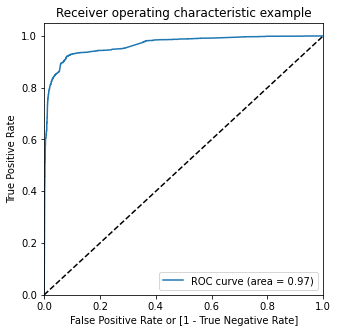

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None 

draw_roc(y_train_pred_final.actual_conv, y_train_pred_final.Converted_Prob) 

# AREA UNDER CURVE IS 0.97 
* That means the model is highly capable of distinguishing between classes.

In [90]:
# Finding optimal cutoff point 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head() 

,actual_conv,Converted_Prob,CustID,Lead score,predicted_conv,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.149718,2178,15,0,1,1,0,0,0,0,0,0,0,0
1,1,0.998909,2924,100,1,1,1,1,1,1,1,1,1,1,1
2,0,0.357033,9108,36,0,1,1,1,1,0,0,0,0,0,0
3,0,0.028360,7926,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.151038,7870,15,0,1,1,0,0,0,0,0,0,0,0


In [91]:
# finding accuracy , sensitivity , specificity for all the cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in numbers:
    accuracy = metrics.accuracy_score(y_train_pred_final.actual_conv , y_train_pred_final[i]) 
    sensitivity = metrics.recall_score(y_train_pred_final.actual_conv , y_train_pred_final[i]) 
    # but there is no module for specificity so we have to manually find that 
    # Specificity = TN/TN+FP 
    con_metrics = metrics.confusion_matrix(y_train_pred_final.actual_conv, y_train_pred_final[i]) 
    TN = con_metrics[0,0]
    FP = con_metrics[0,1] 
    specificity = TN/float(TN+FP) 
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df 

,prob,accuracy,sensi,speci
0.0,0.0,0.392309,1.000000,0.000000
0.1,0.1,0.775004,0.976680,0.644807
0.2,0.2,0.904326,0.932806,0.885940
0.3,0.3,0.919522,0.921344,0.918347
0.4,0.4,0.919057,0.903557,0.929064
0.5,0.5,0.914871,0.859289,0.950753
0.6,0.6,0.916111,0.833597,0.969380
0.7,0.7,0.908668,0.796047,0.981373
0.8,0.8,0.902155,0.773518,0.985200
0.9,0.9,0.881532,0.715415,0.988773


<Figure size 504x360 with 0 Axes>

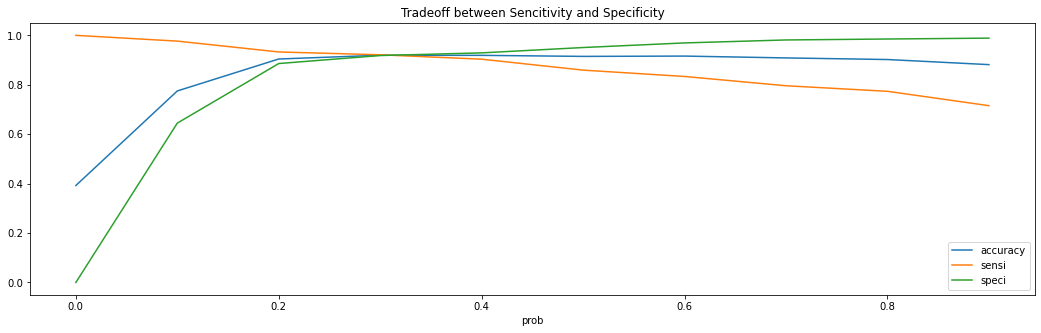

In [92]:
# lets plot to find the best cutoff
plt.figure(figsize=[7,5])
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Tradeoff between Sencitivity and Specificity')
plt.legend(loc="best")
plt.show()

In [93]:
# also lets saw the Precision and Recall Tradeoff
pre_recall_df = pd.DataFrame( columns = ['prob','precision','recall'])
for i in numbers:
    precision = metrics.precision_score(y_train_pred_final.actual_conv, y_train_pred_final[i]) 
    recall = metrics.recall_score(y_train_pred_final.actual_conv , y_train_pred_final[i])
    pre_recall_df.loc[i] =[ i ,precision,recall] 
pre_recall_df

,prob,precision,recall
0.0,0.0,0.392309,1.000000
0.1,0.1,0.639658,0.976680
0.2,0.2,0.840755,0.932806
0.3,0.3,0.879291,0.921344
0.4,0.4,0.891576,0.903557
0.5,0.5,0.918462,0.859289
0.6,0.6,0.946164,0.833597
0.7,0.7,0.965022,0.796047
0.8,0.8,0.971216,0.773518
0.9,0.9,0.976268,0.715415


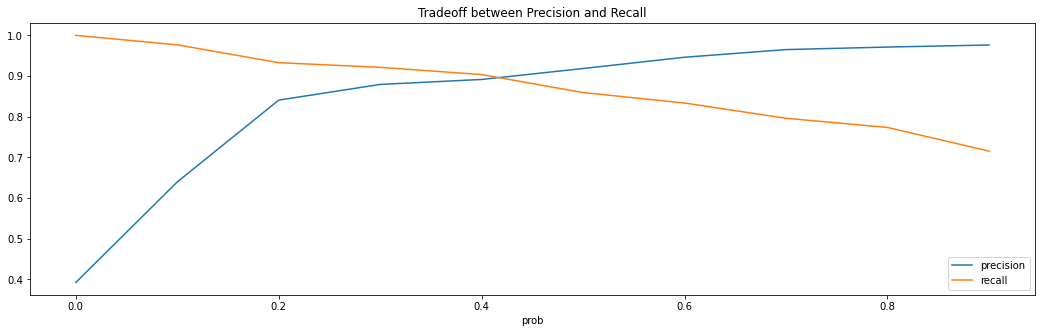

In [94]:

pre_recall_df.plot.line(x='prob', y=['precision','recall'])
plt.title('Tradeoff between Precision and Recall')
plt.legend(loc="best")
plt.show()


In [95]:
# for now lets take the 0.27 as our cutoff .
y_train_pred_final['final_pred_conv'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.30 else 0) 
y_train_pred_final.head()

,actual_conv,Converted_Prob,CustID,Lead score,predicted_conv,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred_conv
0,0,0.149718,2178,15,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.998909,2924,100,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.357033,9108,36,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.028360,7926,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.151038,7870,15,0,1,1,0,0,0,0,0,0,0,0,0


In [96]:
# now lets  again saw the sensitivity and spacificity of the new model 
print(f'sensitivity/Recall-->{metrics.recall_score(y_train_pred_final.actual_conv , y_train_pred_final.final_pred_conv)} ') 

#but for calculating spacificity we need TN and FP 
con_metrics = metrics.confusion_matrix(y_train_pred_final.actual_conv, y_train_pred_final.final_pred_conv) 
TN = con_metrics[0,0]
FP = con_metrics[0,1] 
print(f'spacificity-->{TN/float(TN+FP)}')

# also let see the pricision 
print(f'precision/Positive predicted Rate-->{metrics.precision_score(y_train_pred_final.actual_conv, y_train_pred_final.final_pred_conv)}') 

#lets find False Positive Rate FP/FP+TN 
print(f'False Positive Rate-->{FP/float(TN+FP)}') 

#lets also find Negetive Predicted Rate  
FN = con_metrics[1,0] 
print(f'Negetive Predicted value-->{TN/float(FN+TN)}') 

# accuracy 
print(f'Accuracy--> {metrics.accuracy_score(y_train_pred_final.actual_conv, y_train_pred_final.final_pred_conv)}')

sensitivity/Recall-->0.9213438735177866 
spacificity-->0.9183465169686145
precision/Positive predicted Rate-->0.8792908336476801
False Positive Rate-->0.08165348303138556
Negetive Predicted value-->0.9476040021063717
Accuracy--> 0.9195224065746628


### BOOM!!!
* Our sensitivity increase to 92%  from 85%

In [97]:
# F1score = 2*((precision*sensitivity)/(precision+sensitivity)) 
precision = metrics.precision_score(y_train_pred_final.actual_conv, y_train_pred_final.predicted_conv)
sensitivity = metrics.recall_score(y_train_pred_final.actual_conv, y_train_pred_final.predicted_conv)
F1score = 2*((precision*sensitivity)/(precision+sensitivity)) 
F1score

0.8878905452317747

# Making predictions on the test set 


### scaling the test set

In [98]:
X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website',
                                                                'Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Org_API,Lead Org_Lead Add Form,Lead Org_Lead Import,Lead Org_Quick Add Form,Lead Src_Direct Traffic,Lead Src_Google,Lead Src_Olark Chat,Lead Src_Organic Search,Last Act_Approached upfront,Last Act_Converted to Lead,Last Act_Email Bounced,Last Act_Email Link Clicked,Last Act_Email Opened,Last Act_Form Submitted on Website,Last Act_Had a Phone Conversation,Last Act_Olark Chat Conversation,Last Act_Page Visited on Website,Last Act_SMS Sent,Last Act_Unreachable,Last Act_Unsubscribed,CTRY_India,"SPEC_Banking, Investment And Insurance",SPEC_Business Administration,SPEC_E-Business,SPEC_E-COMMERCE,SPEC_Finance Management,SPEC_Healthcare Management,SPEC_Hospitality Management,SPEC_Human Resource Management,SPEC_IT Projects Management,SPEC_International Business,SPEC_Marketing Management,SPEC_Media and Advertising,SPEC_Operations Management,SPEC_Retail Management,SPEC_Rural and Agribusiness,SPEC_Services Excellence,SPEC_Supply Chain Management,SPEC_Travel and Tourism,OCC_Businessman,OCC_Housewife,OCC_Student,OCC_Unemployed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Not Act_Email Bounced,Last Not Act_Email Link Clicked,Last Not Act_Had a Phone Conversation,Last Not Act_Modified,Last Not Act_Olark Chat Conversation,Last Not Act_Page Visited on Website,Last Not Act_Unreachable
2729,0,0.224988,1.425180,0.814086,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5463,0,0.224988,1.709519,0.814086,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6476,0,1.446841,-0.760791,0.161477,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4135,0,0.530451,-0.407631,1.304769,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5408,0,-0.996864,-0.885755,-1.148647,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
col

['Tags_Will revert after reading the email',
 'Tags_Closed by Horizzon',
 'Lead Org_Lead Add Form',
 'Tags_Ringing',
 'Last Not Act_Modified',
 'Last Act_SMS Sent',
 'Tags_Interested in other courses',
 'Tags_Already a student',
 'Tags_Lost to EINS',
 'Tags_switched off',
 'Tags_invalid number',
 'Total Time Spent on Website']

In [100]:
X_test = X_test[col]
X_test.head()

,Tags_Will revert after reading the email,Tags_Closed by Horizzon,Lead Org_Lead Add Form,Tags_Ringing,Last Not Act_Modified,Last Act_SMS Sent,Tags_Interested in other courses,Tags_Already a student,Tags_Lost to EINS,Tags_switched off,Tags_invalid number,Total Time Spent on Website
2729,1,0,0,0,0,1,0,0,0,0,0,1.425180
5463,0,0,0,0,0,0,0,0,0,0,0,1.709519
6476,0,0,0,1,0,0,0,0,0,0,0,-0.760791
4135,1,0,0,0,0,0,0,0,0,0,0,-0.407631
5408,1,0,0,0,0,1,0,0,0,0,0,-0.885755


In [101]:
X_test = sm.add_constant(X_test)
log_test = sm.GLM(y_test,X_test, family = sm.families.Binomial()).fit()
print(log_test.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2765
Model:                            GLM   Df Residuals:                     2752
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -554.93
Date:                Sun, 07 Aug 2022   Deviance:                       1109.9
Time:                        01:28:12   Pearson chi2:                 2.19e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [102]:
# now lets make a dataframe which contain actual_converted vs predicted_converted.
y_test_pred = log_test.predict(X_test) 
y_test_pred = y_test_pred.values.reshape(-1) 
y_test_pred_final = pd.DataFrame({'actual_conv':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index 

# assigning Score to each Leads
y_test_pred_final['Lead score'] = y_test_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

# cutoff = 0.27
y_test_pred_final['predicted_conv'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.30 else 0) 
y_test_pred_final.head()

,actual_conv,Converted_Prob,CustID,Lead score,predicted_conv
0,1,0.998572,2729,100,1
1,0,0.509395,5463,51,1
2,0,0.002321,6476,0,0
3,1,0.949804,4135,95,1
4,1,0.988246,5408,99,1


In [103]:
# now lets saw the sensitivity and spacificity of the testing model
print(f'sensitivity/Recall-->{metrics.recall_score(y_test_pred_final.actual_conv , y_test_pred_final.predicted_conv)} ') 

#but for calculating spacificity we need TN and FP 
con_metrics = metrics.confusion_matrix(y_test_pred_final.actual_conv, y_test_pred_final.predicted_conv) 
TN = con_metrics[0,0]
FP = con_metrics[0,1] 
print(f'spacificity-->{TN/float(TN+FP)}')

# also let see the pricision 
print(f'precision/Positive predicted Rate-->{metrics.precision_score(y_test_pred_final.actual_conv, y_test_pred_final.predicted_conv)}') 

#lets find False Positive Rate FP/FP+TN 
print(f'False Positive Rate-->{FP/float(TN+FP)}') 

#lets also find Negetive Predicted Rate  
FN = con_metrics[1,0] 
print(f'Negetive Predicted value-->{TN/float(FN+TN)}') 

# accuracy 
print(f'Accuracy--> {metrics.accuracy_score(y_test_pred_final.actual_conv, y_test_pred_final.predicted_conv)}')

sensitivity/Recall-->0.921875 
spacificity-->0.9138426191843768
precision/Positive predicted Rate-->0.8628884826325411
False Positive Rate-->0.0861573808156232
Negetive Predicted value-->0.9521244763614602
Accuracy--> 0.9168173598553345


In [104]:
# F1score = 2*((precision*sensitivity)/(precision+sensitivity)) 
precision = metrics.precision_score(y_test_pred_final.actual_conv, y_test_pred_final.predicted_conv)
sensitivity = metrics.recall_score(y_test_pred_final.actual_conv, y_test_pred_final.predicted_conv)
F1score = 2*((precision*sensitivity)/(precision+sensitivity)) 
F1score

0.8914069877242681

# MODEL SUMMARY

## most important features are  
1. Tags_Closed by Horizzon 
2. Tags_Lost to EINS 
3. Tags_Will revert after reading the email 
4. Lead Org_Lead Add Form 
5. Last Act_SMS Sent 
6. Total Time Spent on Website

#### CUTOFF
* after analyzing ROC,sensitivity specificity tradeoff and precision recall tradeoff we decided that our cutoff should be 0.27 
* That means if probability of a lead is greater than 0.27 then probably that customer get converted or convert into paying customers. 
* and if the probability of a lead is less than 0.27 indicating that the customer does not convert or not buying any course . 


### our model accuracy is around 92% 
* which tells us how well we identify positives as positives and negatives as negative in our case positives means converted leads and negative means not converted leads . 
* But only high accuracy don't solve our business problem . 
* our main goal is to correctly identify the hot leads or converted leads . 
* That means our sensitivity/recall and precision should be as high as possible .




### our model sensitivity or recall is around 92% 
* which tells us how well we identified the actual positives as positive. In our case how well we identified the actual converted leads(hot leads) as converted leads(hot leads). 

###  our model specificity is around 91% 
* which tells us how well we identified the actual negative as negative in our case negative means not converted leads. 

### our model precision is around 86% 
* which tells us that from all predicted positives how many of them are correctly identified as positive. 


# so overall our model is doing great  


In [105]:
print("$*# THE END @!%$#%"*7)

$*# THE END @!%$#%$*# THE END @!%$#%$*# THE END @!%$#%$*# THE END @!%$#%$*# THE END @!%$#%$*# THE END @!%$#%$*# THE END @!%$#%
